### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [ ]:
# Mount Google Drive to access dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the data
data = pd.read_csv('/content/drive/MyDrive/used_device_data.csv')

## Data Overview

- Observations
- Sanity checks

In [ ]:
# View the first few rows of the dataset
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [ ]:
# View the last few rows of the dataset
data.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


In [ ]:
# Check the shape of the dataset
print(data.shape)

(3454, 15)


In [ ]:
# Use info() to find the datatype of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [ ]:
# Use describe() to print a concise summary of the dataset
data.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


In [ ]:
# Use the isnull() function to to see if there are any missing values in the data
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
# Use the isna() function to see if there are any duplicate values in the data
data.isna().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

### Observations

*   There are 3454 rows and 15 columns as described by the shape function. There are 11 numerical columns and 4 object-type columns.
*   There are 202 missing values in the in the data, with almost 90 percent of them belonging to the main_camera_mp column.
*   There are 202 duplicate values in the columns, which is equal to the number of missing values.


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# Function to create a labeled bar plot
def labeled_barplot(data, feature, perc=False, n=None, hue=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    hue: column to use for coloring the bars (default is None)
    """

    total = len(data[feature])  # Length of the Column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=hue,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )   # Percentage of each class of the category
        else:
            label = p.get_height()  # Count of each level of the category

        x = p.get_x() + p.get_width() / 2   # Width of the plot
        y = p.get_height()  # Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )   # Annotate the percentage

    plt.show()  # Show the plot

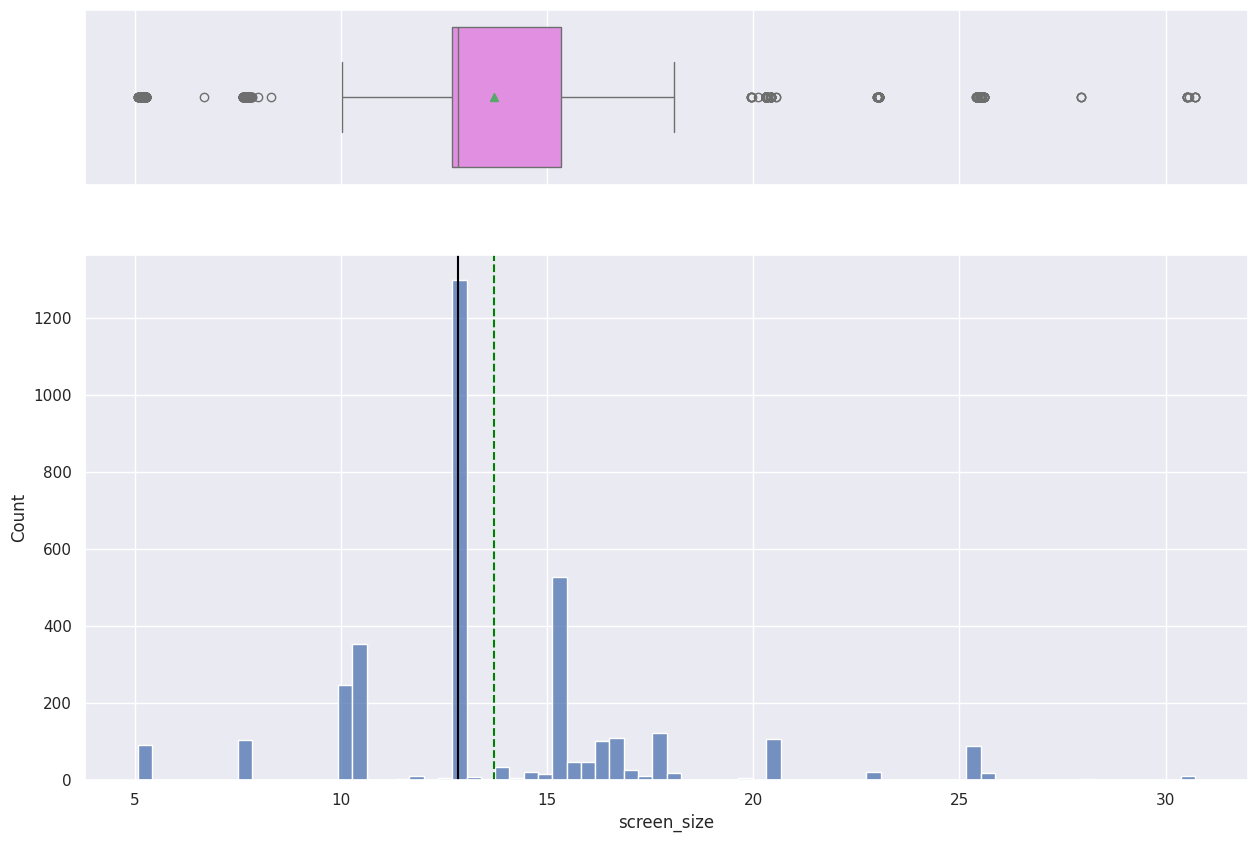

In [ ]:
# Visualization of 'screen size'
histogram_boxplot(df, "screen_size")

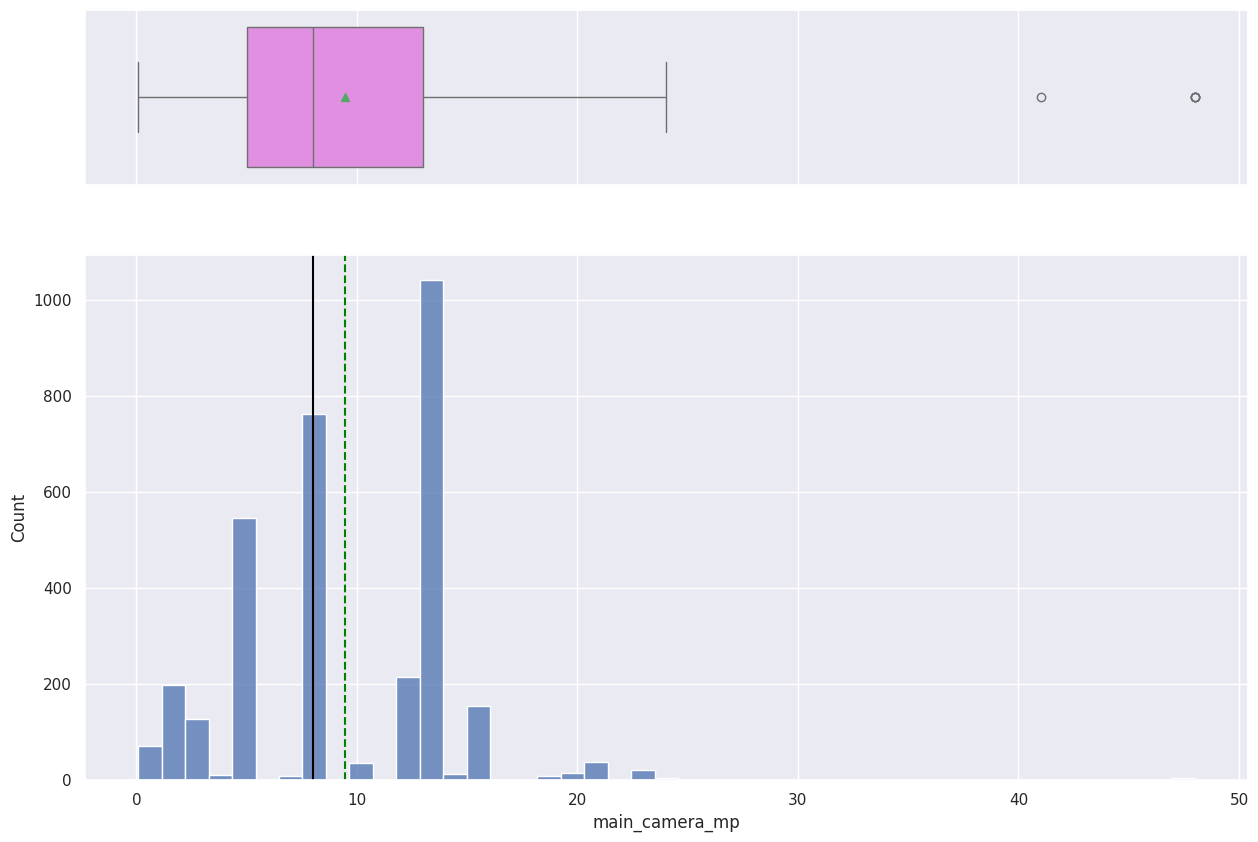

In [ ]:
# Visualization of 'main_camera_mp'
histogram_boxplot(df, "main_camera_mp")

### Observations

*   Screen size distribution is skewed to the right, with 75 percent of all screens being at least 12.7 cm.
*   Main camera MP distribution is also skewed to the right, with 75 percent of all main cameras having at least 5.0MP.
*   Like screen size and main camera MP, selfie camera distribution is also skewed to the right, with 75 percent of all selfie cameras having a maximum of 8.0MP.
*   The vast majority of devices offer 4GB of RAM, with outliers on both sides and a median of 4GB and a mean of slightly more than 4GB.
*   Battery mAh has distribution that is skewed very slightly to the right, with 75 percent of all batteries having a capacity of 4000 or less mAh.
*   Weight has a distribution that is skewed to the right, with most falling between 80 and 250 grams. There are numerous outliers above 250 grams, the heaviest being more than 800 grams.
*   Days used has a distribution skewed to the left, with 75 percent of all devices being used about 869 days or less.
*   Normalized used price is very close to normally distributed, with a median of 4.41 euros and a mean of about 4.36 euros.
*   Normalized new price is also very close to normally distributed, with a median of 5.25 euros and a mean of about 5.23 euros.
*   Samsung (9.9 percent), Huawai (7.3), LG (5.8), and Lenovo (5.0) are the brands with the largest percentage of devices in the sample. “Others” makes up 14.5 percent of the devices in the sample, which is made up of 25 different brands.
*   Android devices make up 93.1 percent of the sample.
*   72 percent of the devices are 4G or 5G compatible, with only 4.4 percent being 5G compatible.
*   Over 50 percent of the devices are from 2013, 2014, or 2015. 2013 is the oldest release year for a device, with 2020 being the most recent release year.

### Bivariate Analysis

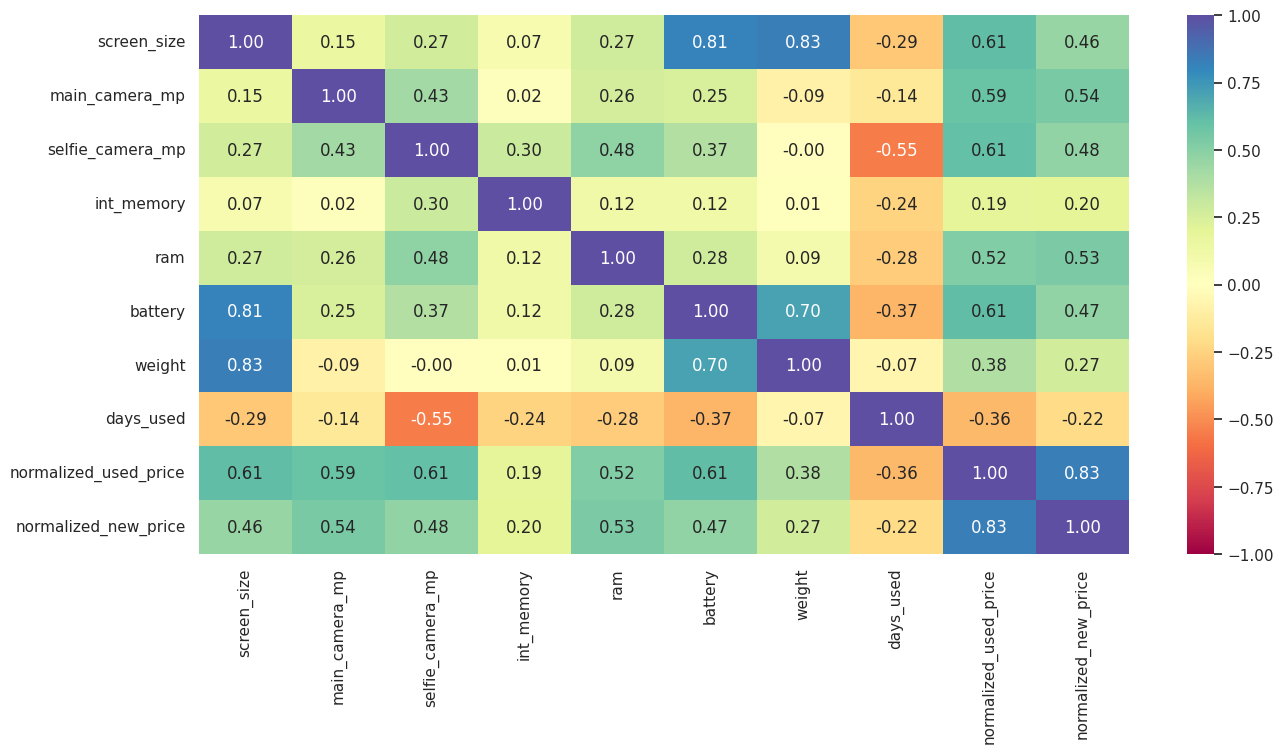

In [ ]:
# Check correlation
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a time-based variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

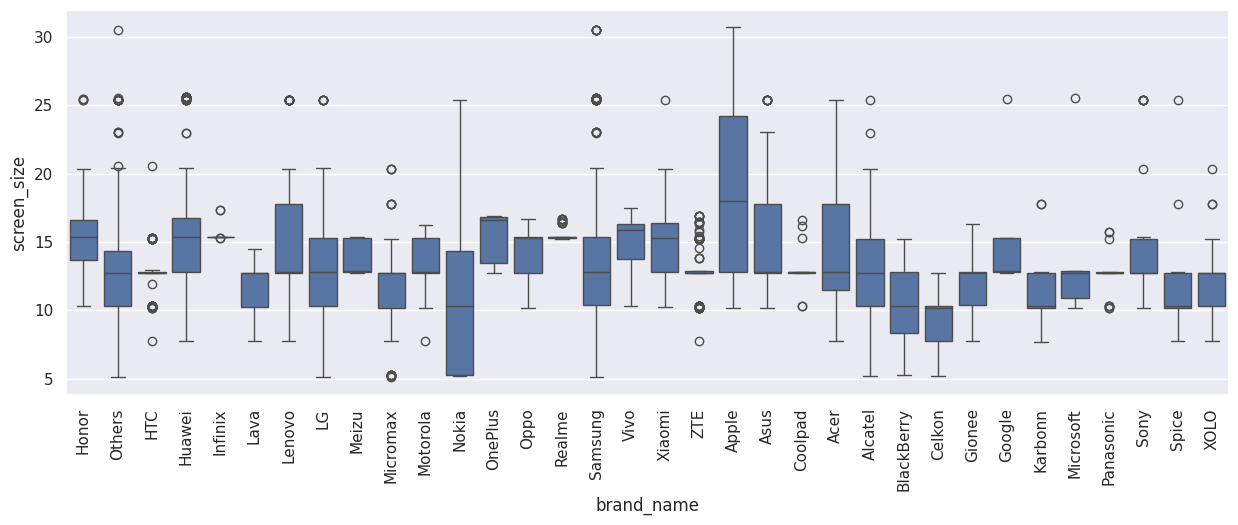

In [ ]:
# Check screen size across brands
# Create box plot
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="screen_size")
plt.xticks(rotation=90)
plt.show()

### Observations



*   Normalized used price and normalized new price have the strongest correlation (0.83), along with screen size and weight (0.83). The next-strongest correlation is screen size and battery at 0.81.
*   Apple appears to offer the largest selection of large screen sizes, with the highest median screen size (about 18 cm).
*   The vast majority of brands offer main cameras with 12MP or less. Sony offers the most high-resolution cameras, as 25 percent of its devices have main cameras with at least 20 MP. However, there are three brands that offer devices that have main cameras with more than 40 MP - Motorola, Nokia and ZTE.
*   Eight brands offer selfie cameras with at least 30 MP, including three (Huawei, Oppo, and Xiaomi) where over 30 MP is not an outlier.
*   Celkon is the only brand with 25 percent of its devices offering at least 250GB of internal memory.
*   OnePlus is the only brand with 25 percent of its devices offering at least 8GB of RAM, and it is the only brand where 12GB of RAM is not an outlier. Five other brands have devices with 12GB of RAM.
*   Apple appears to have the most high-capacity batteries, as it is the only brand with 25 percent of its devices possessing a capacity of at least 7000 mAh.
*   Micromax offers the lightest devices with large batteries (at least 4500 mAh), as it is the only brand with a device that possesses a large battery and has a weight of about 115 grams.
*   Apple is the only brand with 25 percent of its devices having screens of at least 28 cm in size.
*   Normalized used prices steadily increase from 2013 to 2018, and increase slightly in 2019 before almost leveling off in 2020.
*   Normalized new prices increase sharply from 2013 to 2014, and then increase slowly from 2014 to 2015, before increasing at a higher rate each year until 2018. From 2018 to 2019, the normalized new price decreases, and levels off from 2019 to 2020.
*   Used devices that are 4G compatible tend to have higher normalized used prices than those that do not, with 75 percent having a price tag of at least 4.2 euros. 75 percent of used devices that are not 4G compatible have a price of about 4.2 euros or less. Likewise, devices that are 5G compatible tend to have a higher normalized used price than those that do not. 75 percent of used 5G compatible devices have a price tag of at least 5.0 euros, while 75 percent of used devices that are not 5G compatible have a price of about 4.7 euros or less.
*   This trend holds true for normalized new prices as well. 50 percent of new 4G compatible devices have a price tag of at least 5.4 euros, while 75 percent of new devices that are not 4G compatible have a price of 5.2 or less. 75 percent of new 5G compatible devices cost 6.9 euros or more, while 75 percent of new devices that are not 5G compatible cost 5.7 euros or less.



## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing Value Treatment

In [ ]:
# Copy the dataframe
df2 = df.copy()

In [ ]:
# Repeat code from earlier using new dataframe to check for missing values
df2.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
# Impute missing values with the column medians
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df2[col] = df2[col].fillna(
        value=df2.groupby(['release_year', 'brand_name'])[col].transform("median")
    )

# Check for missing values again
df2.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
# Impute remaining missing values with column medians grouped by brand_name
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

for col in cols_impute:
    df2[col] = df2[col].fillna(
        value=df2.groupby(['brand_name'])[col].transform("median")
    )

# Check for missing values again
df2.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

In [ ]:
# Fill remaining missing values in main_camera_mp with column median
df2["main_camera_mp"] = df2["main_camera_mp"].fillna(df2["main_camera_mp"].median())

# Check for missing values again
df2.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

### Feature engineering

In [ ]:
# Create a new column for year after release using the collection year (2021) as a baseline
df2["years_after_release"] = 2021 - df2["release_year"]
df2.drop("release_year", axis=1, inplace=True)
df2["years_after_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_after_release, dtype: float64

### Outlier Check

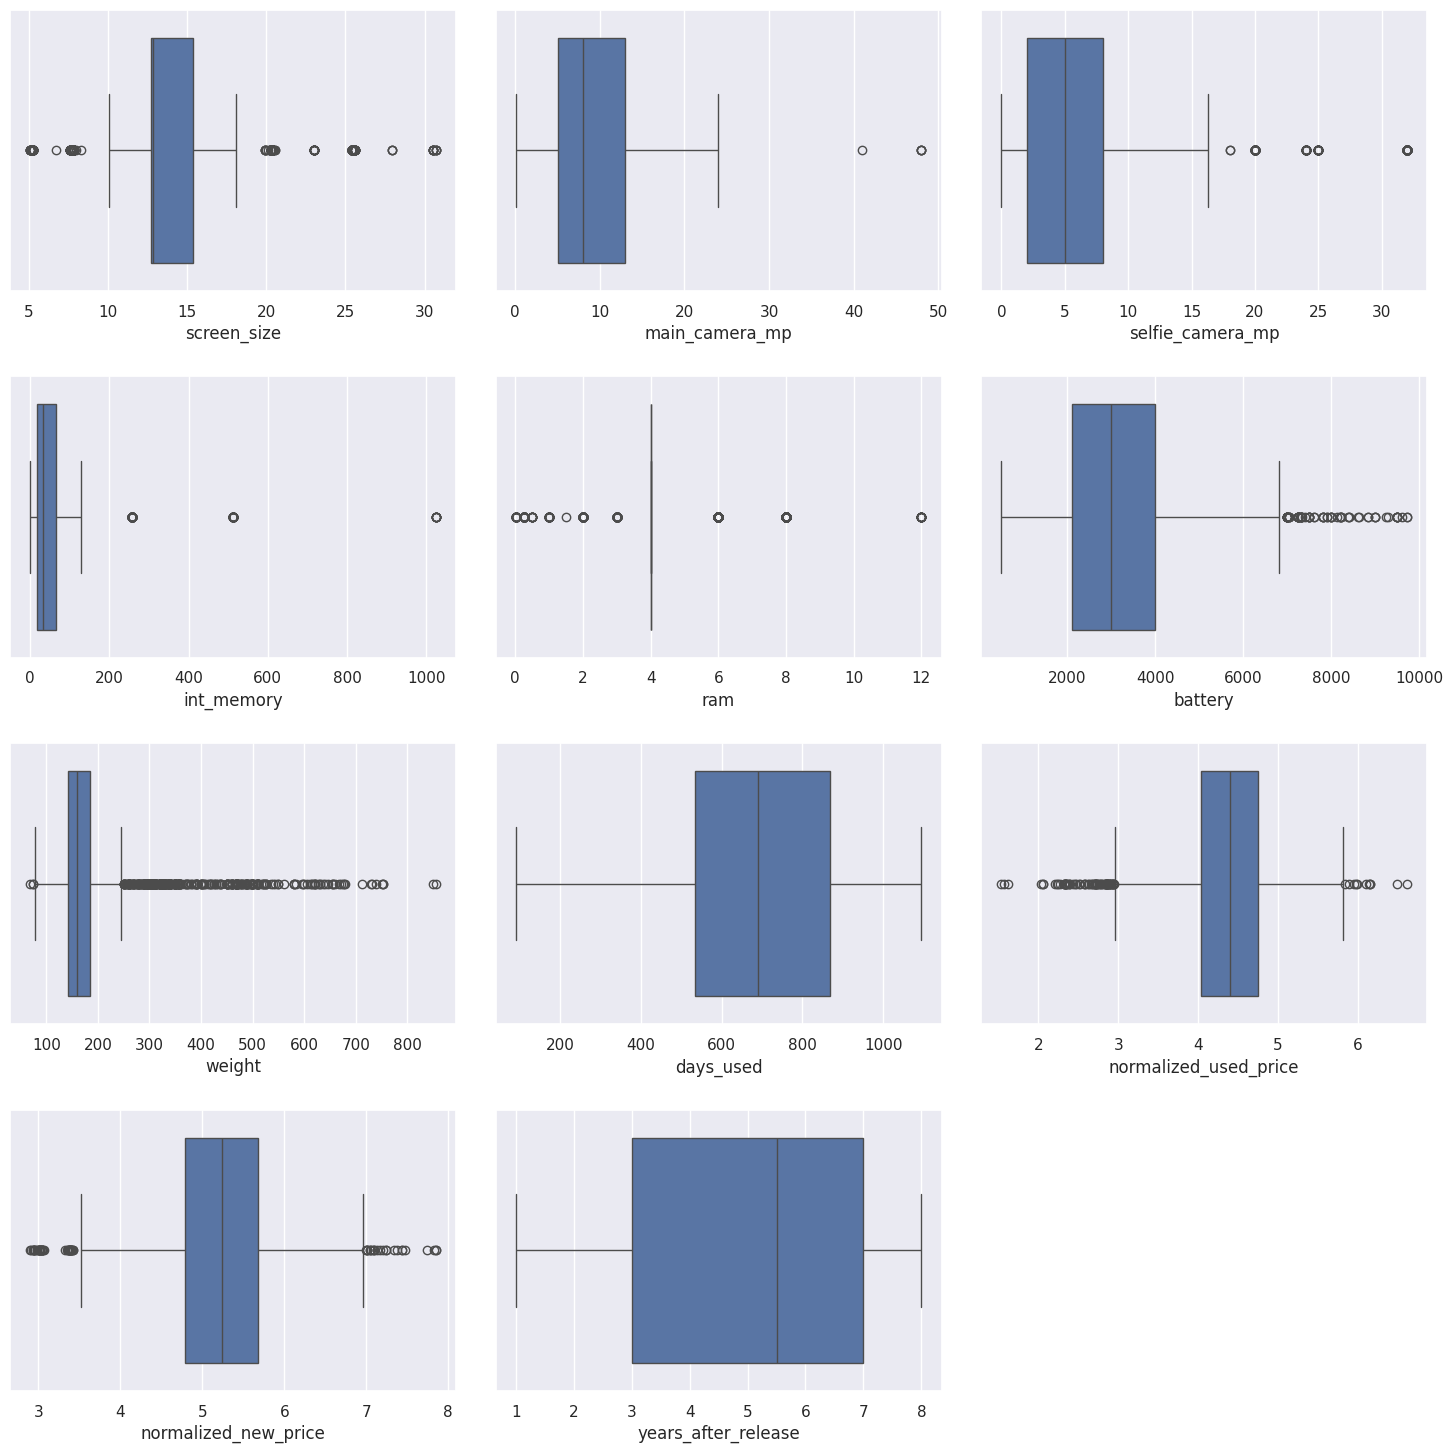

In [ ]:
# Check for outliers using boxplots
num_cols = df2.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df2, x=variable)
    plt.tight_layout(pad=2)

plt.show()



*   There are quite a few outliers in the data.
*   We will leave them as is due to the sheer number of outliers.



### Data Preperation for Modeling

In [ ]:
# Define independent and dependent varialbes
X = df2.drop(columns=['normalized_used_price'])
y = df2['normalized_used_price']

print(X.head())
print()
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_after_release  
0              4.715100                    1  
1              5.519018                    1  
2              5.884631                    1  
3              5.6

In [ ]:
# Add the intercept to data
X = sm.add_constant(X)

In [ ]:
# Create dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# Verify data is split 70:30
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## EDA

In [ ]:
# Use describe() to print a concise summary of the new dataset
df2.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3454.0,NaN,NaN,NaN,9.617597,4.749438,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3454.0,NaN,NaN,NaN,6.555067,6.96844,0.0,2.0,5.0,8.0,32.0
int_memory,3454.0,NaN,NaN,NaN,54.528474,84.934991,0.01,16.0,32.0,64.0,1024.0
ram,3454.0,NaN,NaN,NaN,4.03262,1.368598,0.02,4.0,4.0,4.0,12.0
battery,3454.0,NaN,NaN,NaN,3132.577446,1298.884193,500.0,2100.0,3000.0,4000.0,9720.0


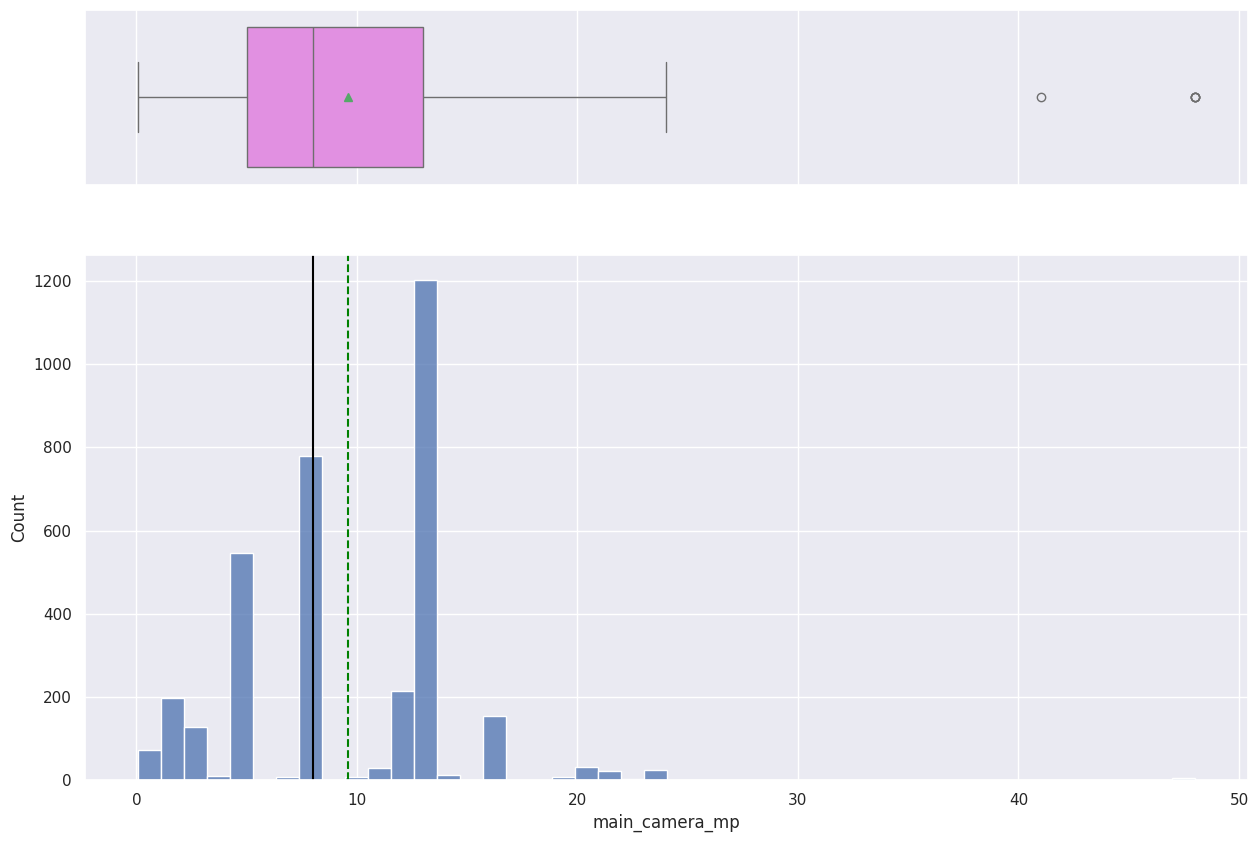

In [ ]:
# Reevaluate main camera MP after filling in missing values with median
histogram_boxplot(df2, "main_camera_mp")

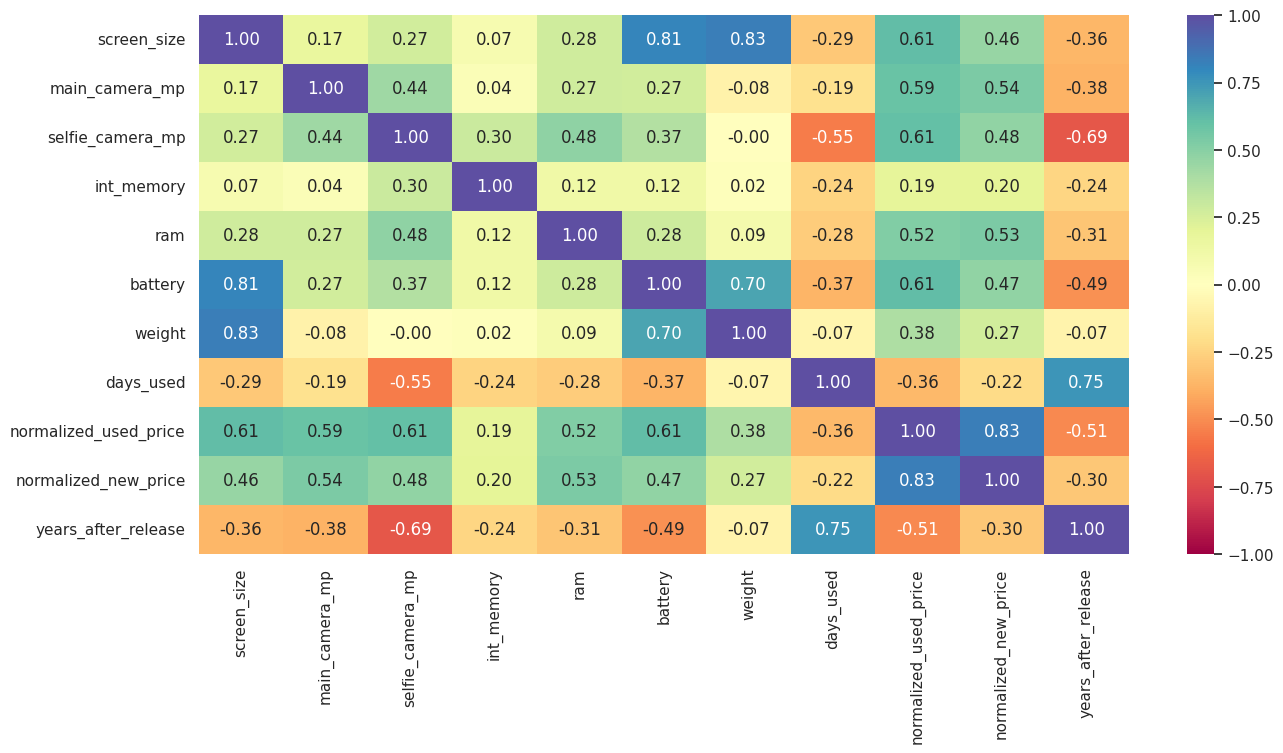

In [ ]:
# Recheck correlation
cols_list = df2.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 7))
sns.heatmap(
    df2[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Observations



*   Missing value treatment does not appear to have significantly impacted the data, other than slightly changing the mean for all variables that received the missing value treatment.
*   Correlation does not appear to be significantly impacted.
*   The brand Infinix, which did not have any data for main camera MP, now appears in the box plot comparing main camera MPs by brand.



## Model Building - Linear Regression

In [ ]:
# Fit the OLS model
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Fri, 22 Mar 2024   Prob (F-statistic):               0.00
Time:                           17:33:05   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


**Interpreting the Regression Results:**

1.   Adjusted R-squared
  *   The value for adj. R-squared is 0.842, which is good, as the closer it is to 1, generally it indicates a better fit.
2.   *const* coefficient
  *   If all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the *const* coefficient, which is 1.3150


## Model Performance Check

In [ ]:
# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # To compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # To compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # To compute RMSE
    mae = mean_absolute_error(target, pred)  # To compute MAE
    mape = mape_score(target, pred)  # To compute MAPE

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# Checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229884,0.180326,0.844886,0.841675,4.326841


In [ ]:
# Checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238358,0.184749,0.842479,0.834659,4.501651


**Observations**

*   The training R-squared is 0.842, so the model is not underfitting.
*   The train and test RMSE and MAE are very close, so the model is not overfitting.
*   MAE suggests that the model can predict anime ratings within a mean error of 0.18 on the test data.
*   MAPE of 4.50 on the test data means that we are able to predict within 4.5 percent of the normalized used price.


## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.



1.  **No Multicollinearity**

2.  **Linearity of variables**

3.  **Independence of error terms**

4.  **Normality of error terms**

5.  **No Heteroscedasticity**



### **TEST FOR MULTICOLLINEARITY**

- Use VIF to test for multicollinearity.

- **General Rule of thumb**:
    - If VIF is 1 then there is no correlation between the $k$th predictor and the remaining predictor variables.
    - If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
    - If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

In [ ]:
# Define a function to check Variance Inflaction Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
# Use function to check VIF
checking_vif(x_train)

,feature,VIF
0,const,227.744081
1,screen_size,7.677290
2,main_camera_mp,2.285051
3,selfie_camera_mp,2.812473
4,int_memory,1.364152
5,ram,2.282352
6,battery,4.081780
7,weight,6.396749
8,days_used,2.660269
9,normalized_new_price,3.119430




*   There are multiple columns with very high VIF values (VIF > 5), indicitaing presence of strong multicollinearity.



### **Removing Multicollinearity**
1.   Drop every column one by one that has a VIF score greater than 5.
2.   Look at the adjusted R-squared and RMSE of all these models.
3.   Drop the variable that makes the least change in adjusted R-squared.
4.   Check the VIF scores again.
5.   Continue until all VIF scores are under 5.

In [ ]:
# Define function to assist with removing multicollinearity
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
# Check the columns with the two highest IVF, so weight and screen_size
col_list = ["weight", "screen_size"]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.838381,0.234703
1,weight,0.838071,0.234928


In [ ]:
# Drop screen_size first since it impacts R-squared less
col_to_drop = "screen_size"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,202.673906
1,main_camera_mp,2.281835
2,selfie_camera_mp,2.809009
3,int_memory,1.362043
4,ram,2.282350
5,battery,3.842989
6,weight,2.993855
7,days_used,2.648929
8,normalized_new_price,3.077650
9,years_after_release,4.730315




*   All VIF values are < 5, so multicollinearity has been dealt with.
*   Rebuild the model using updated set of predictors variables.


In [ ]:
# Rebuild model using x_train2
olsmod2 = sm.OLS(y_train, x_train2).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.7
Date:                   Fri, 22 Mar 2024   Prob (F-statistic):               0.00
Time:                           17:33:51   Log-Likelihood:                 97.950
No. Observations:                   2417   AIC:                            -99.90
Df Residuals:                       2369   BIC:                             178.0
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


**Observations**


*   Adj. R-squared has dropped from 0.842 to 0.838, indicating the dropped column did not have much effect on the model.
*   As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance.



### **Dealing with high p-value variables**

- Drop the predictor variables with a p-value greater than 0.05 as they do not significantly impact the target variable.
- P-values can sometimes change after dropping a variable. So, do not drop all variables at once.
- Instead:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Generate a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the previous two steps till there are no columns with p-value greater than 0.05

In [ ]:
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'years_after_release', 'brand_name_Karbonn', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', 'os_iOS', '4g_yes', '5g_yes']


In [ ]:
# Define new variables
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [ ]:
# Build new model with updated variables
olsmod3 = sm.OLS(y_train, x_train3).fit()
print(olsmod3.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Fri, 22 Mar 2024   Prob (F-statistic):               0.00
Time:                           17:34:17   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# Checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod3_train_perf = model_performance_regression(olsmod3, x_train3, y_train)
olsmod3_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


In [ ]:
# Checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod3_test_perf = model_performance_regression(olsmod3, x_test3, y_test)
olsmod3_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


**Observations**

*   No feature has p-value greater than 0.05, so we'll consider the features in x_train3 as the final set of predictor variables and olsmod3 as the final model to move forward with.
*   Now adj. R-squared is 0.838, i.e., our model is able to explain ~84% of the variance.
*   Variables we dropped did not impact adj. R-squared significantly, and therefore were not affecting the model.
*   RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting

### **TEST FOR LINEARITY AND INDEPENDENCE**

* Test for linearity and independence by generating a plot of fitted values vs residuals and check for patterns.
* No pattern indicates the model is linear and residuals are independent.
* Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [ ]:
# Create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod3.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod3.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.867319,0.220169
1525,4.448399,4.602001,-0.153602
1128,4.315353,4.286957,0.028395
3003,4.282068,4.195169,0.086899
2907,4.456438,4.490563,-0.034125


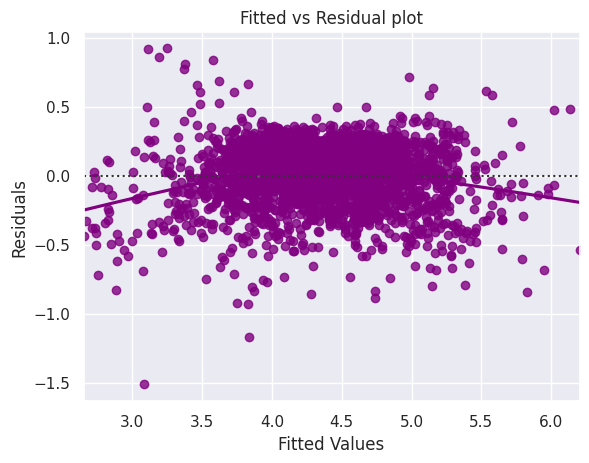

In [ ]:
# Plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()



*   There does not appear to be any pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.



### **TEST FOR NORMALITY**
- Check the distribution of residuals, check the Q-Q plot of residuals, and use the Shapiro-Wilk test.
- If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
- If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

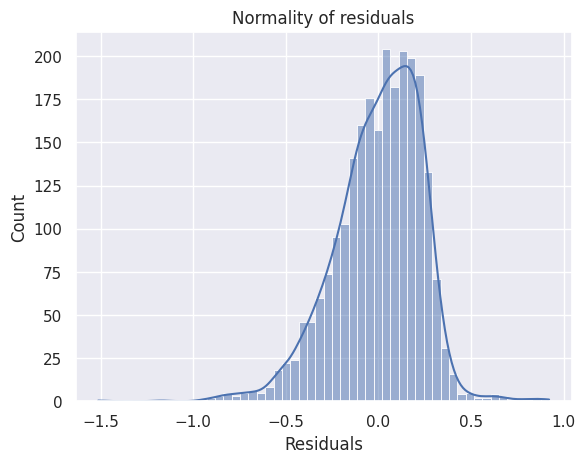

In [ ]:
# Plot the normality of residuals
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

* The histogram has a steep bell shape, maybe a slight skew to the left.

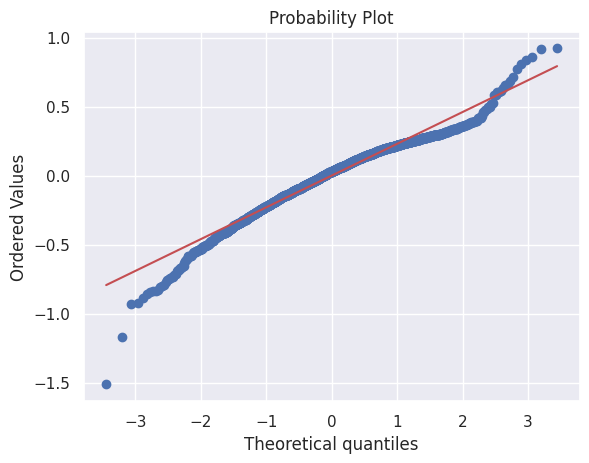

In [ ]:
# Create Q-Q plot
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

* The residuals more or less follow a straight line except for the tails.

In [ ]:
# Run Shapiro-Wilk test
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9676972031593323, pvalue=6.995261942370773e-23)

* Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
* As an approximation, we can accept this distribution as close to being normal.
* So, the assumption is satisfied.

### **TEST FOR HOMOSCEDASTICITY**

* Use the goldfeldquandt test to test for homoscedasticity.
* If a p-value greater than 0.05 is produced, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

In [ ]:
# Import libraries to run goldfeldquandt test
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0087504199106758), ('p-value', 0.4401970650667301)]

* The p-value > 0.05, indicating the residuals are homoscedastic.

## Final Model

In [ ]:
# Define final variables
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [ ]:
# Build final model with final variables
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Fri, 22 Mar 2024   Prob (F-statistic):               0.00
Time:                           17:35:03   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# Check the model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


In [ ]:
# Check model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


* The model is able to explain about 84 percent of the variation in the data.

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting.

* The MAPE on the test set suggests we can predict within 4.6 percent of the normalized used price.

* Hence, we can conclude the model olsmodel_final is good for prediction as well as inference purposes.

## Actionable Insights and Recommendations

- The model is able to explain about 84 percent of the variation in the data and within 4.6 percent of the normalized used price on the test data, which is good.
  * This indicates that the model is good for prediction as well as inference purposes
- If the MP of the main camera of the device increases by one unit, then its normalized used price increases by 0.0210 units, all other variables held constant.

- If the RAM of the device increases by one unit, then its normalized used price increases by 0.0207 units, all other variables held constant.

- If the MP of the selfie camera of the device increases by one unit, then its normalized used price increases by 0.0138 units, all other variables held constant.

- If the weight of the device increases by one gram, then its normalized used price increases by 0.0017 units, all other variables held constant.

- If the years after release of the device increases by one unit, then its normalized used price decreases by 0.0292 units, all other variables held constant.

- 4G compatible phones tend to have a more positive impact on the normalized used price compared to other phones. 5G compatible phones appear to have a negative impact on normalized used price.

- Certain brands impact the normalized used price. Samsung and Sony impact the price negatively, while Karbonn and Xiaomi have a positive impact. Keep brand reputation and customer perception in mind when pricing devices.

- The longer a device has been on the market, the lower the normalized used price. Adjust prices accordingly.

- Focus on improving features that have a positive impact on the normalized used price, specifically MP for main and selfie cameras, as well as RAM.

- Be aware of technological trends, such as the adoption of 5G, which may not necessarily have a positive impact on normalized used price.

- Refine the model as the market changes with trends in technology, brands, and features.

___